# Coronagraphic astrometry to detect exomoons at α Centauri *A*
### - Collaborators: Enrico Biancalani, Eduardo Bendek, and Kevin Wagner
[Script enhancements and clean-up aided by Microsoft Copilot and ChatGPT]

### Utilities

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter, NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import formatter


bright_colors = [

    '#FF0000',
    '#00AAFF',
    '#00CC00',
    '#FF8800',
    '#AA00FF',
    '#FF00AA',
    '#00FFCC',
    '#CC0000',
    '#0000FF',
    '#008800',
    '#FF44AA'

]

In [9]:
# Fundamental physical constants

gravitational_constant_m3_kg_1_s_2 = 6.6743e-11


# Useful conversion factors

arcsec_per_radian = 60. * 60. * 180. / np.pi
uas_per_radian = arcsec_per_radian * 1.e6
m_per_AU = 1.495978707e11

### Functional definitions

In [10]:
def calculate_semimajor_axis_m(P_s, M_total_kg):

    semimajor_axis_m = (gravitational_constant_m3_kg_1_s_2 * M_total_kg * P_s**2. / (4. * np.pi**2.))**(1/3)

    return semimajor_axis_m

### Case studies

In [11]:
# Exoworld parameters of interest

distance_alphaCen_pc = 1.33

M_Saturn_kg = 5.6834e26
M_Earth_kg = 5.9722e24
M_Neptune_kg = 1.0241e26

moon_data = {

    "Io (J)": {
        'orbital_period_days': 1.769,
        'mass_kg': 8.932e22
    },
    "Europa (J)": {
        'orbital_period_days': 3.551,
        'mass_kg': 4.800e22
    },
    "Ganymede (J)": {
        'orbital_period_days': 7.155,
        'mass_kg': 1.482e23
    },
    "Callisto (J)": {
        'orbital_period_days': 16.689,
        'mass_kg': 1.076e23
    },

    "Mimas (S)": {
        'orbital_period_days': .942,
        'mass_kg': 3.749e19
    },
    "Enceladus (S)": {
        'orbital_period_days': 1.370,
        'mass_kg': 1.080e20
    },
    "Tethys (S)": {
        'orbital_period_days': 1.888,
        'mass_kg': 6.175e20
    },
    "Dione (S)": {
        'orbital_period_days': 2.737,
        'mass_kg': 1.095e21
    },
    "Rhea (S)": {
        'orbital_period_days': 4.518,
        'mass_kg': 2.307e21
    },
    "Titan (S)": {
        'orbital_period_days': 15.945,
        'mass_kg': 1.345e23
    },
    "Iapetus (S)": {
        'orbital_period_days': 79.322,
        'mass_kg': 1.806e21
    }

}

P_s_Callisto = moon_data["Callisto (J)"]['orbital_period_days'] * 24. * 60. * 60.
print(f"Orbital period of a Callisto-like moon: P = {P_s_Callisto:.3e} s")

Orbital period of a Callisto-like moon: P = 1.442e+06 s


In [12]:
M_Saturn_Earth_kg = M_Saturn_kg + M_Earth_kg

M_ratio = M_Saturn_Earth_kg / M_Earth_kg
print(f"Mass ratio (M_Saturn + M_Earth) / M_Earth = {M_ratio:.3f}")

semimajor_axis_m = calculate_semimajor_axis_m(P_s_Callisto, M_Saturn_Earth_kg)
semimajor_axis_AU = semimajor_axis_m / m_per_AU
print(f"From Kepler's 3rd law, semi-major axis with respect to the two-body center of mass = {semimajor_axis_AU:.3e} AU")

astrometric_signal_amplitude_uas = (1. / M_ratio) * semimajor_axis_AU * (1. / distance_alphaCen_pc) * 1.e6
print(f"\nAstrometric signal amplitude = {astrometric_signal_amplitude_uas:.3f} micro-arcseconds")

Mass ratio (M_Saturn + M_Earth) / M_Earth = 96.164
From Kepler's 3rd law, semi-major axis with respect to the two-body center of mass = 8.448e-03 AU

Astrometric signal amplitude = 66.055 micro-arcseconds


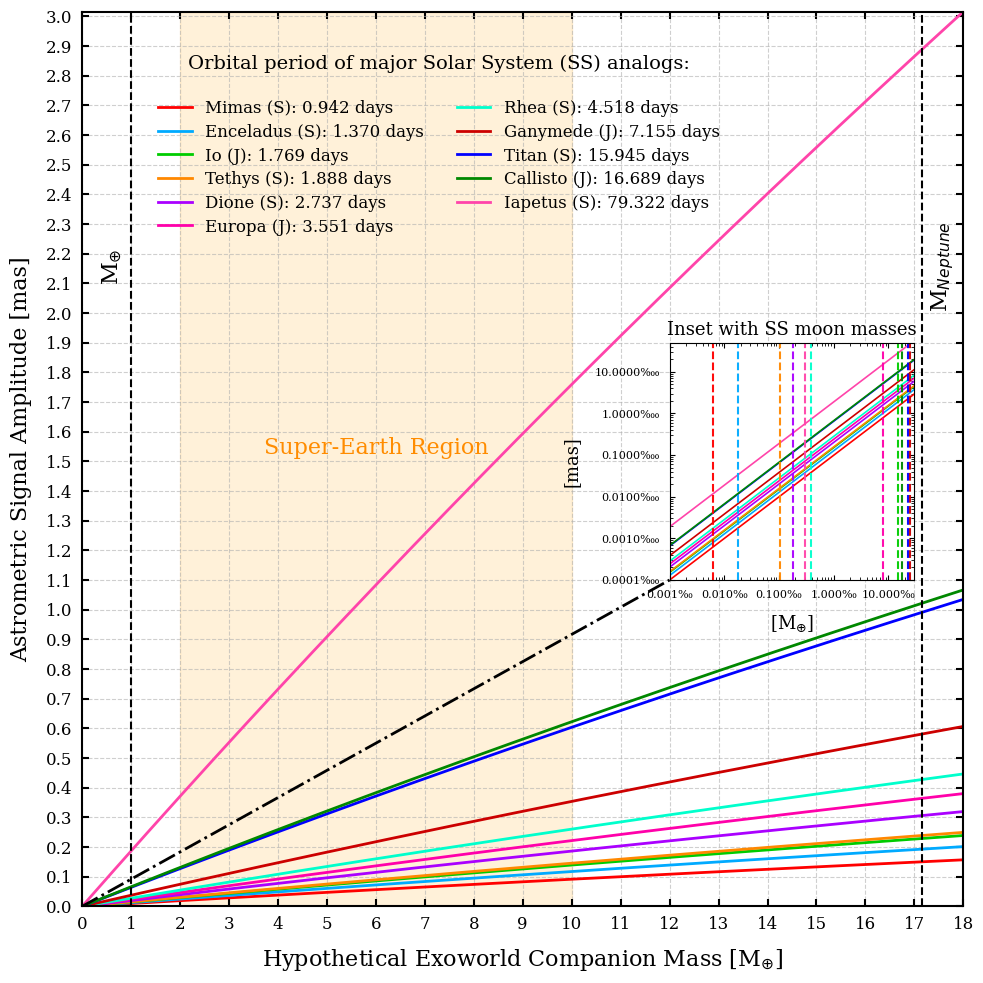

In [13]:
M_Neptune_in_M_Earth = M_Neptune_kg / M_Earth_kg

n_mass_steps = 1000
exomoon_mass_in_Mearth_array = np.linspace(0., 18., n_mass_steps)


plt.figure(figsize=(10,10))

sorted_moons = sorted(moon_data.items(), key=lambda x: x[1]['orbital_period_days'])

overall_max_mas = 0.

for idx, (moon_name, moon_info) in enumerate(sorted_moons):

    color = bright_colors[idx % len(bright_colors)]

    P_days = moon_info['orbital_period_days']
    P_s = P_days * 24. * 60. * 60.

    astrometric_signal_amplitude_mas_array = np.zeros_like(exomoon_mass_in_Mearth_array)

    for i, M_moon_in_Mearth in enumerate(exomoon_mass_in_Mearth_array):

        M_moon_kg = M_moon_in_Mearth * M_Earth_kg
        M_planet_moon_kg = M_Saturn_kg + M_moon_kg

        semimajor_axis_m = calculate_semimajor_axis_m(P_s, M_planet_moon_kg)
        semimajor_axis_AU = semimajor_axis_m / m_per_AU

        astrometric_signal_amplitude_mas = (M_moon_kg / M_planet_moon_kg) * semimajor_axis_AU * (1. / distance_alphaCen_pc) * 1.e3
        astrometric_signal_amplitude_mas_array[i] = astrometric_signal_amplitude_mas

    overall_max_mas = max(overall_max_mas, astrometric_signal_amplitude_mas_array.max())


    plt.plot(
        exomoon_mass_in_Mearth_array,
        astrometric_signal_amplitude_mas_array,
        color=color,
        linewidth=2.,
        label=f"{moon_name}: {P_days:.3f} days"
    )

ax = plt.gca()

ax.axvline(
    1.,
    linestyle='--',
    linewidth=1.5,
    color='k'
)
ax.axvline(
    M_Neptune_in_M_Earth,
    linestyle='--',
    linewidth=1.5,
    color='k'
)
ax.axvspan(
    2.,
    10.,
    alpha=.15,
    color='orange'
)

y_top = overall_max_mas
offset = .15
y_mid = .5 * y_top

ax.text(
    1. - offset,
    y_mid + .65,
    "M$_{\\oplus}$",
    rotation=90.,
    fontsize=16.,
    va='center',
    ha='right'
)
ax.text(
    M_Neptune_in_M_Earth + offset,
    y_mid + .65,
    "M$_{Neptune}$",
    rotation=90.,
    fontsize=16.,
    va='center',
    ha='left'
)
ax.text(
    .5 * (2. + 10.),
    y_mid + .075,
    "Super-Earth Region",
    fontsize=16.,
    ha='center',
    va='top',
    color='darkorange'
)

plt.xlim(0., M_Neptune_in_M_Earth)
plt.ylim(0., overall_max_mas)

plt.xticks(np.arange(0, np.ceil(exomoon_mass_in_Mearth_array.max()) + 1., 1.))
plt.yticks(np.arange(0., overall_max_mas, .1))

plt.xlabel("Hypothetical Exoworld Companion Mass [M$_{\\oplus}$]", fontsize=16.)
plt.ylabel("Astrometric Signal Amplitude [mas]", fontsize=16.)
#plt.title(
#   "α Cen $Ab$: Astrometric Signal Amplitude Induced by Hypothetical Companions\n"
#   "[assuming a Saturn-mass primary exoplanet and using Kepler's 3ʳᵈ law]",
#   fontsize=18
#)

plt.grid(True, linestyle='--', alpha=.6)

plt.legend(
    title="Orbital period of major Solar System (SS) analogs:\n",
    title_fontsize=14.,
    fontsize=12.,
    ncol=2,
    loc='upper center',
    bbox_to_anchor=(.405, .971)
)

axins = ax.inset_axes([12., 1.1, 5., .8], transform=ax.transData)

inset_lines = {}
for line in ax.get_lines():

    thin_lw = .6 * line.get_linewidth()
    new_line, = axins.plot(
        line.get_xdata(),
        line.get_ydata(),
        color=line.get_color(),
        linestyle='-',
        linewidth=thin_lw,
        marker=None
    )
    inset_lines[line.get_label()] = new_line

axins.set_xscale('log')
axins.set_xlim(1.e-6, 3.e-2)
axins.set_yscale('log')
axins.set_ylim(1.e-8, 5.e-3)

axins.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{1.e3 * x:.3f}‰"))
axins.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{1.e4 * x:.4f}‱"))

for idx, (moon_name, moon_info) in enumerate(sorted_moons):

    mass_kg = moon_info['mass_kg']
    color = bright_colors[idx % len(bright_colors)]

    axins.axvline(
            mass_kg / M_Earth_kg,
            color=color,
            linestyle='--',
            linewidth=1.5,
            alpha=.95
        )

axins.set_xlabel("[M$_{\\oplus}$]", fontsize=13.)
axins.set_ylabel("[mas]", fontsize=13.)
axins.set_title("Inset with SS moon masses", fontsize=13.)

axins.tick_params(labelsize=8.)

x_inset, y_inset = 12., 1.1

main_line = ax.get_lines()[0]
xdata = np.array(main_line.get_xdata())
ydata = np.array(main_line.get_ydata())

y_at_zero = np.interp(0., xdata, ydata)

ax.plot(
    [0., x_inset],
    [y_at_zero, y_inset],
    color='black',
    linewidth=2.,
    linestyle='-.',
    zorder=10
)

ax.tick_params(axis='both', which='major', width=1.5, length=5., labelsize=12.)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

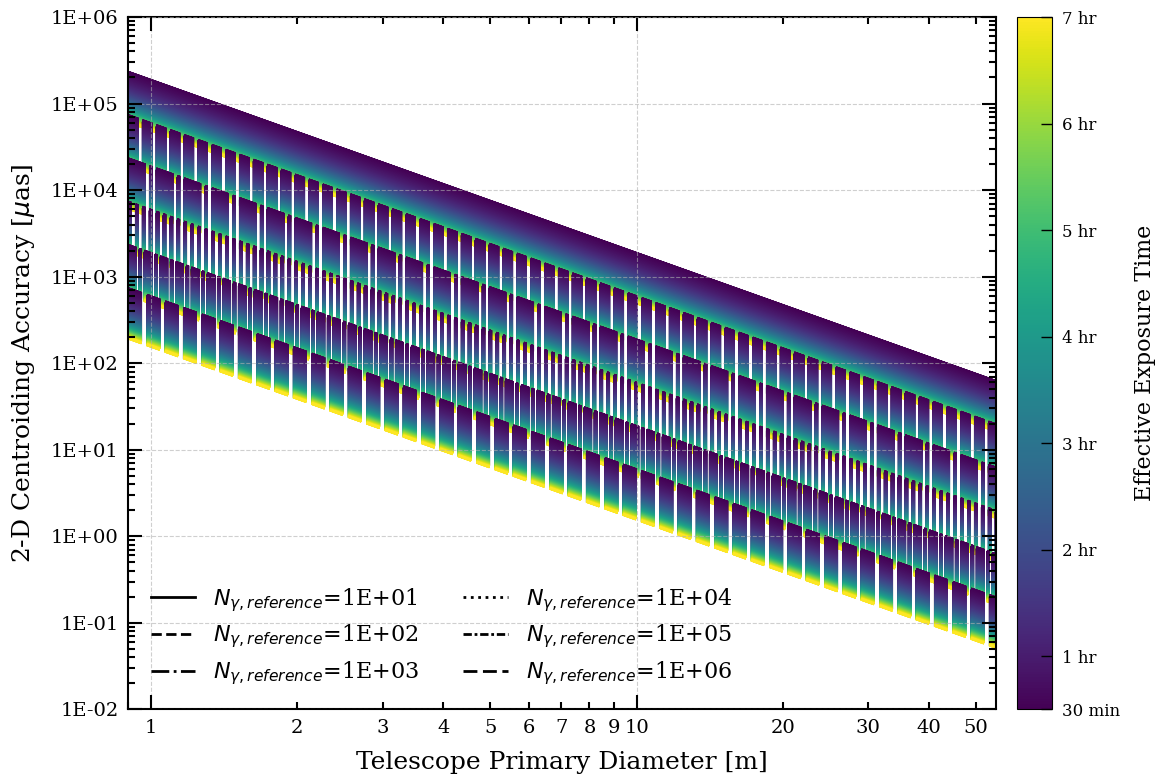

In [14]:
lambda_nm = 754.
lambda_m  = lambda_nm * 1.e-9

A_reference_m2 = 3.972749
D_reference_m = 2. * np.sqrt(A_reference_m2 / np.pi)

t_reference_hr = 6.97
#t_reference_hr = 2 * 6.97    # Post-processing factor of 2 for, e.g., reference-star differential imaging

end_to_end_throughput_reference = .02

Delta_lam_reference_nm = .01 * 754.


def sigma_2D(N_gamma, lam_m, D_m):

    return (np.sqrt(2. / N_gamma) / np.pi) * (lam_m / D_m)


def N_gamma_scaling(N_gamma, D_m, t_exposure_hr, end_to_end_throughput=end_to_end_throughput_reference, Delta_lam_nm=Delta_lam_reference_nm):

    N_gamma_trade = N_gamma * (D_m / D_reference_m)**2. * (t_exposure_hr / t_reference_hr) * (end_to_end_throughput / end_to_end_throughput_reference) * (Delta_lam_nm / Delta_lam_reference_nm)

    return N_gamma_trade


N_gamma_reference_values = np.array([1.e1, 1.e2, 1.e3, 1.e4, 1.e5, 1.e6])

D_reference_m_values = np.logspace(np.log10(.9), np.log10(55.), 1000)

sec_per_hr = 60. * 60.
t_sec_values = np.logspace(np.log10(30. * 60.), np.log10(7. * sec_per_hr), 1000)
t_hr_values = t_sec_values / sec_per_hr


fig, ax = plt.subplots(figsize=(12,8))

norm = mpl.colors.Normalize(vmin=t_sec_values.min(), vmax=t_sec_values.max())
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2))]

for i, N_gamma_ref in enumerate(N_gamma_reference_values):

    ls = line_styles[i % len(line_styles)]

    for t_hr in t_hr_values:

        N_gamma = N_gamma_scaling(N_gamma=N_gamma_ref, D_m=D_reference_m_values, t_exposure_hr=t_hr)
        sigma = sigma_2D(N_gamma, lambda_m, D_reference_m_values) * uas_per_radian

        ax.plot(D_reference_m_values, sigma, color=cmap(norm(t_hr * sec_per_hr)), linestyle=ls, linewidth=2., zorder=1)

    ax.plot([], [], color='k', linestyle=ls, linewidth=2., label=f"$N_{{\\gamma, reference}}$={N_gamma_ref:.0E}")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Telescope Primary Diameter [m]", fontsize=18.)
ax.set_ylabel(r"2-D Centroiding Accuracy [$\mu$as]", fontsize=18.)

#ax.set_title(
#   "Diffraction- & Photon-Noise-Limited Astrometic Accuracy Trade, Based on Guyon+2012\n"
#   "[treating the scaling quantities independently from one another;\n"
#   f"and assuming a single-target monochromatic Airy PSF @{int(lambda_nm)} nm,\n"
#   "no wavefront aberrations, no secondary obstruction, and continous detector sampling]",
#   fontsize=16,
#   pad=30,
#)

plt.legend(loc='lower left', fontsize=16., frameon=False, ncol=2)

xmin, xmax = .9, 55.
ax.set_xlim(xmin, xmax)

xt = [x for x in ax.get_xticks() if xmin < x <= xmax]
ax.set_xticks(sorted(set(xt)))

def plain_log_x(x, pos):
    if x <= 0. or x <= xmin:
        return ""
    if abs(x - round(x)) < 1.e-10:
        return f"{int(round(x))}"
    return f"{x:g}"

ax.xaxis.set_major_formatter(FuncFormatter(plain_log_x))
ax.xaxis.set_minor_formatter(FuncFormatter(plain_log_x))

def sci_E(y, pos):
    if y <= 0.:
        return ""
    return f"{y:.0E}"

ax.yaxis.set_major_formatter(FuncFormatter(sci_E))
ax.yaxis.set_minor_formatter(NullFormatter())

ax.tick_params(axis='x', which='major', width=1.5, length=10., labelsize=14., top=True, labeltop=False)
ax.tick_params(axis='x', which='minor', width=1.5, length=5., labelsize=14., top=True, labeltop=False)

ax.tick_params(axis='y', which='major', width=1.5, length=10., labelsize=14., right=True, labelright=False)
ax.tick_params(axis='y', which='minor', width=1.5, length=5., right=True)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.set_axisbelow(False)

ax.grid(True, linestyle='--', alpha=.6)

ax.set_ylim(bottom=1.e-2, top=1.e6)

cbar = fig.colorbar(sm, ax=ax, pad=.02)
cbar.set_label("Effective Exposure Time", fontsize=16.)
cbar.ax.tick_params(which='major', width=1., length=8., labelsize=12.)

ticks = np.array([.5*sec_per_hr, sec_per_hr, 2.*sec_per_hr, 3.*sec_per_hr, 4.*sec_per_hr, 5.*sec_per_hr, 6.*sec_per_hr, 7.*sec_per_hr])
cbar.set_ticks(ticks)
cbar.set_ticklabels(["30 min", "1 hr", "2 hr", "3 hr", "4 hr", "5 hr", "6 hr", "7 hr"])

plt.tight_layout()
plt.show()